In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import random
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = [25,12]
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings('ignore')

In [2]:
usecol = ['INSP_TIME','PART_CD','HQ_CD', 'VENDOR_SEQ', 'MODEL_CODE', 'MODEL_NAME', 'SERIAL_CODE', 'REWORK', 'INSP_NO']
for i in range(1, 92):
    usecol.append('NO{}'.format(i))
aircon = pd.read_csv("에어컨협력사DATA(AGENT).csv",usecols = usecol)
print(len(aircon))
aircon.head()

669454


,INSP_TIME,PART_CD,HQ_CD,VENDOR_SEQ,MODEL_CODE,MODEL_NAME,SERIAL_CODE,REWORK,INSP_NO,NO1,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91
0,20210419145444,DB90-12086C,DDJV,DDJV,DB90-12086C,RODIN,B0DB9012086CDDJVR4K0245,N,1.000,Z4556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210419145446,DB90-12086C,DDJV,DDJV,DB90-12086C,RODIN,B0DB9012086CDDJVR4K0246,N,1.000,Z4556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210419145448,DB90-12086C,DDJV,DDJV,DB90-12086C,RODIN,B0DB9012086CDDJVR4K0247,N,1.000,Z4556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210419145517,DB90-12086C,DDJV,DDJV,DB90-12086C,RODIN,B0DB9012086CDDJVR4K0248,N,1.000,Z4556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210419145521,DB90-12086C,DDJV,DDJV,DB90-12086C,RODIN,B0DB9012086CDDJVR4K0250,N,1.000,Z4556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ins_code = pd.read_csv('검사항목코드.csv')
print(len(ins_code))
ins_code.head()

2395


,PARA_CD,PARA_NM
0,02918,Length1
1,05537,Aparencia
2,15607,width1
3,21768,HEIGHT
4,A0099,output voltage 1


In [4]:
assy_key = pd.read_csv('조립이력(KEY).csv')
print(len(assy_key))
assy_key.head()

299826


,WORK_YMD,ASSY_DT,MODEL_CODE,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO
0,20210105,20210105112017,AF17TX773TZN,BDRDP3ER100034F,DDJV,DB90-11536C,E2DB9011536CDDJVR140045
1,20210105,20210105111743,AF17TX773TZN,BDRDP3ER100029A,DDJV,DB90-11536C,E2DB9011536CDDJVR140072
2,20210105,20210105111734,AF17TX773TZN,BDRDP3ER100032Z,DDJV,DB90-11536C,E2DB9011536CDDJVR140075
3,20210105,20210105112637,AF17TX773TZN,BDRDP3ER100041P,DDJV,DB90-11536C,E2DB9011536CDDJVR140078
4,20210105,20210105111819,AF17TX773TZN,BDRDP3ER100031L,DDJV,DB90-11536C,E2DB9011536CDDJVR140090


In [5]:
market = pd.read_csv('시장불량세트SN.csv')
print(len(market))
market.head()

66


,MARKET_SN
0,BB74P3ER500221V
1,BB6HP3ER600111P
2,BBA3P3ER700033Z
3,BB74P3ER900075M
4,BBBMP3ER800139K


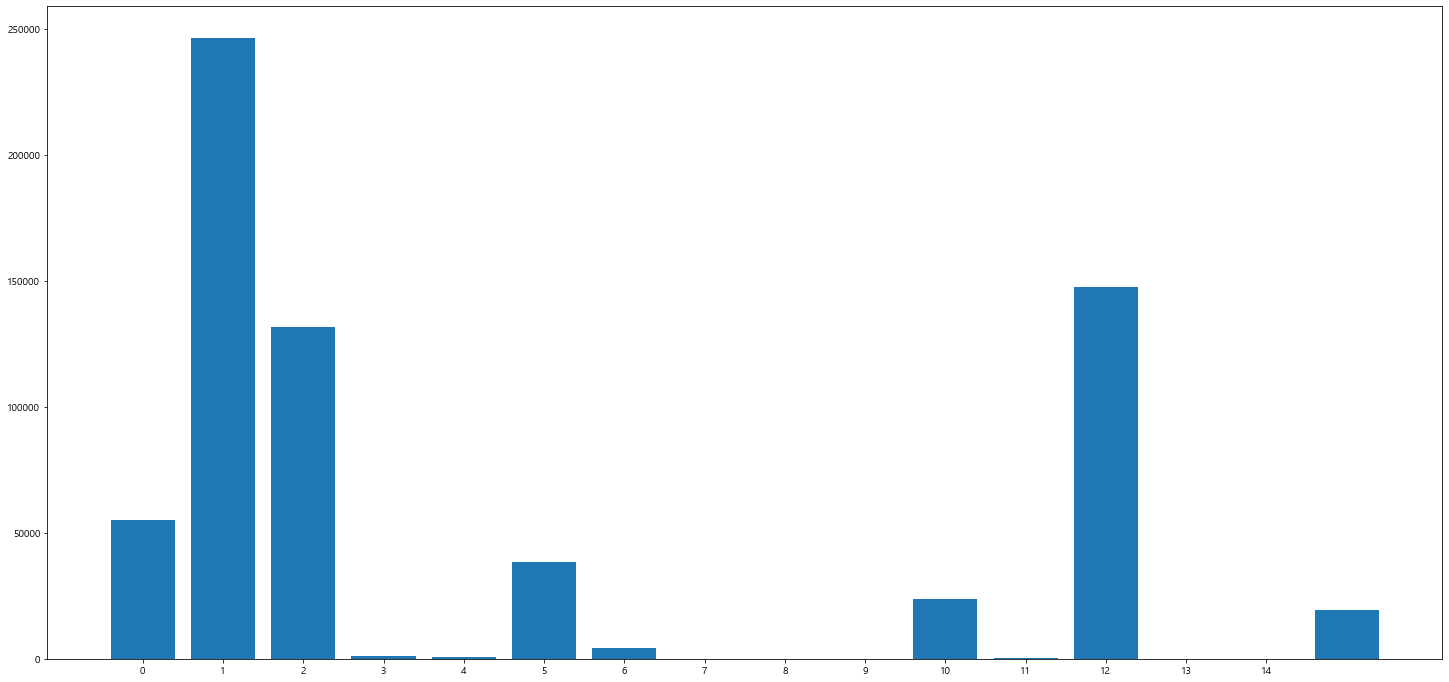

In [44]:
aircon_ctf = aircon.groupby(['INSP_NO']).size()
aircon_ctf1 = pd.DataFrame(aircon_ctf, columns = ['SIZE'])
aircon_ctf1.reset_index(inplace = True)
aircon_ctf1['INSP_NO'] = aircon_ctf1['INSP_NO'].astype(int)

plt.bar(aircon_ctf1['INSP_NO'], aircon_ctf1['SIZE'])
plt.xticks([i for i in range(len(aircon_ctf1))])
plt.show()

In [6]:
market_assy = pd.merge(market, assy_key, left_on = 'MARKET_SN', right_on = 'PRODC_MAGT_NO', how = 'left')
market_assy

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO
0,BB74P3ER500221V,20210527,20210527144306,AP110RNPDBH1,BB74P3ER500221V,DK20,DB90-12152B,B0DB9012152BDK20R5T0147
1,BB6HP3ER600111P,20210622,20210622161411,AP110RNPPBH1,BB6HP3ER600111P,DK20,DB90-12152A,B0DB9012152ADK20R6M0038
2,BBA3P3ER700033Z,20210701,20210701110755,AP072RNPDBH1,BBA3P3ER700033Z,DK20,DB90-12143C,B0DB9012143CDK20R6X0094
3,BB74P3ER900075M,20210902,20210902100953,AP110RNPDBH1,BB74P3ER900075M,DK20,DB90-12152B,B0DB9012152BDK20R8Z0016
4,BBBMP3ER800139K,20210826,20210826084842,AP110RNPDHH1,BBBMP3ER800139K,DK20,DB90-12152B,B0DB9012152BDK20R8S0022
...,...,...,...,...,...,...,...,...
61,BBA5P3ER500063Z,20210512,20210512172213,AP083RNPDBC1,BBA5P3ER500063Z,DDJV,DB90-12143J,B0DB9012143JDDJVR5B0012
62,BB6HP3ER500247T,20210526,20210526161319,AP110RNPPBH1,BB6HP3ER500247T,DK20,DB90-12152A,B0DB9012152ADK20R5S0081
63,BBA5P3ER500023M,20210512,20210512171352,AP083RNPDBC1,BBA5P3ER500023M,DDJV,DB90-12143J,B0DB9012143JDDJVR5B0016
64,BBBZP3ER500336T,20210522,20210522093839,AP145RNPDHH1,BBBZP3ER500336T,DK20,DB90-12152A,B0DB9012152ADK20R5L0006


In [7]:
market_ins = pd.merge(market_assy, aircon, left_on = 'ASSY_NO', right_on = 'SERIAL_CODE', how = 'left')
market_ins

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91
0,BB74P3ER500221V,20210527,20210527144306,AP110RNPDBH1,BB74P3ER500221V,DK20,DB90-12152B,B0DB9012152BDK20R5T0147,20210526173451,DB90-12152B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BB74P3ER500221V,20210527,20210527144306,AP110RNPDBH1,BB74P3ER500221V,DK20,DB90-12152B,B0DB9012152BDK20R5T0147,20210526164533,DB90-12152B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BB74P3ER500221V,20210527,20210527144306,AP110RNPDBH1,BB74P3ER500221V,DK20,DB90-12152B,B0DB9012152BDK20R5T0147,20210526164533,DB90-12152B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BB6HP3ER600111P,20210622,20210622161411,AP110RNPPBH1,BB6HP3ER600111P,DK20,DB90-12152A,B0DB9012152ADK20R6M0038,20210621145143,DB90-12152A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BB6HP3ER600111P,20210622,20210622161411,AP110RNPPBH1,BB6HP3ER600111P,DK20,DB90-12152A,B0DB9012152ADK20R6M0038,20210621151310,DB90-12152A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,BBBZP3ER500336T,20210522,20210522093839,AP145RNPDHH1,BBBZP3ER500336T,DK20,DB90-12152A,B0DB9012152ADK20R5L0006,20210520204826,DB90-12152A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,BBBZP3ER500336T,20210522,20210522093839,AP145RNPDHH1,BBBZP3ER500336T,DK20,DB90-12152A,B0DB9012152ADK20R5L0006,20210520201237,DB90-12152A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,BBAXP3ER500018F,20210518,20210518190123,AP083RNPPBH1,BBAXP3ER500018F,DK20,DB90-12143D,B0DB9012143DDK20R5H0025,20210517153910,DB90-12143D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,BBAXP3ER500018F,20210518,20210518190123,AP083RNPPBH1,BBAXP3ER500018F,DK20,DB90-12143D,B0DB9012143DDK20R5H0025,20210517145907,DB90-12143D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
market_ins[['MARKET_SN', 'MODEL_CODE_x', 'PRODC_MAGT_NO', 'ASSY_NO', 'REWORK', 'INSP_NO','NO1', 'NO7', 'NO13', 'NO31']]

,MARKET_SN,MODEL_CODE_x,PRODC_MAGT_NO,ASSY_NO,REWORK,INSP_NO,NO1,NO7,NO13,NO31
0,BB74P3ER500221V,AP110RNPDBH1,BB74P3ER500221V,B0DB9012152BDK20R5T0147,N,1.000,Z7282,PASS,NaN,NaN
1,BB74P3ER500221V,AP110RNPDBH1,BB74P3ER500221V,B0DB9012152BDK20R5T0147,N,1.000,Z4556,PASS,NaN,NaN
2,BB74P3ER500221V,AP110RNPDBH1,BB74P3ER500221V,B0DB9012152BDK20R5T0147,N,5.000,Z8642,Z7282,Z7286,PASS
3,BB6HP3ER600111P,AP110RNPPBH1,BB6HP3ER600111P,B0DB9012152ADK20R6M0038,N,1.000,Z4556,PASS,NaN,NaN
4,BB6HP3ER600111P,AP110RNPPBH1,BB6HP3ER600111P,B0DB9012152ADK20R6M0038,N,5.000,Z8642,Z7282,Z7286,PASS
...,...,...,...,...,...,...,...,...,...,...
201,BBBZP3ER500336T,AP145RNPDHH1,BBBZP3ER500336T,B0DB9012152ADK20R5L0006,N,1.000,Z7282,PASS,NaN,NaN
202,BBBZP3ER500336T,AP145RNPDHH1,BBBZP3ER500336T,B0DB9012152ADK20R5L0006,N,5.000,Z8642,Z7282,Z7286,PASS
203,BBAXP3ER500018F,AP083RNPPBH1,BBAXP3ER500018F,B0DB9012143DDK20R5H0025,N,1.000,Z7282,PASS,NaN,NaN
204,BBAXP3ER500018F,AP083RNPPBH1,BBAXP3ER500018F,B0DB9012143DDK20R5H0025,N,1.000,Z4556,PASS,NaN,NaN


In [14]:
market_ins.groupby(['INSP_NO']).size()

INSP_NO
0.000       9
1.000     100
2.000      26
3.000       1
5.000      35
6.000       1
10.000      2
12.000     29
15.000      3
dtype: int64

In [11]:
# column 이름 변경 함수
def column_change(data):
    import pandas as pd
    # 마지막 column은 최종판정
    data.rename(columns = {'{}'.format(data.columns[-1]) : '최종판정'}, inplace = True)
    
    data.rename(columns = {'INSP_NO' : 'CTF수'}, inplace = True)
    
    # 검사명, 계량/계수, 스펙, 단위, 데이터, 결과 순으로 돌아가야함
    count = 0
    for i in range(1, 92, 6):
        count += 1
        data.rename(columns = {'NO{}'.format(i) : '검사코드{}'.format(count)}, inplace = True)
    count = 0
    for i in range(2, 92, 6):
        count += 1
        data.rename(columns = {'NO{}'.format(i) : '계량/계수{}'.format(count)}, inplace = True)
    count = 0    
    for i in range(3, 92, 6):
        count += 1
        data.rename(columns = {'NO{}'.format(i) : '스펙{}'.format(count)}, inplace = True)
    count = 0    
    for i in range(4, 92, 6):
        count += 1
        data.rename(columns = {'NO{}'.format(i) : '단위{}'.format(count)}, inplace = True)
    count = 0
    for i in range(5, 92, 6):
        count += 1
        data.rename(columns = {'NO{}'.format(i) : '데이터{}'.format(count)}, inplace = True)
    count = 0
    for i in range(6, 92, 6):
        count += 1
        data.rename(columns = {'NO{}'.format(i) : '결과{}'.format(count)}, inplace = True)

In [12]:
market_ins1 = market_ins[(market_ins['NO7'] == 'PASS') | (market_ins['NO7'] == 'FAIL')]
market_ins1 = pd.merge(market_ins1, ins_code, left_on='NO1', right_on='PARA_CD', how='left')
market_ins1 = market_ins1[['INSP_TIME', 'HQ_CD', 'MODEL_CODE_y', 'SERIAL_CODE', 'REWORK', 'INSP_NO', 'NO1','PARA_NM', 'NO2', 'NO3', 'NO4','NO5','NO6','NO7']]

market_ins1.reset_index(inplace = True)
market_ins1.drop('index', axis = 1, inplace = True)

column_change(market_ins1)

market_ins1_1 = market_ins1.스펙1.str.split('_')
market_ins1['스펙1_min'] = market_ins1_1.str.get(0)
market_ins1['스펙1_max'] = market_ins1_1.str.get(1)
market_ins1 = market_ins1[['INSP_TIME', 'HQ_CD', 'MODEL_CODE_y', 'SERIAL_CODE', 'REWORK', 'CTF수', '검사코드1','PARA_NM', '계량/계수1', '스펙1_min', '스펙1_max','데이터1','결과1','최종판정']]
market_ins1.rename(columns = {'PARA_NM' : '검사명1'}, inplace = True)

In [13]:
market_ins1

,INSP_TIME,HQ_CD,MODEL_CODE_y,SERIAL_CODE,REWORK,CTF수,검사코드1,검사명1,계량/계수1,스펙1_min,스펙1_max,데이터1,결과1,최종판정
0,20210526173451,DK20,DB90-12152B,B0DB9012152BDK20R5T0147,N,1.000,Z7282,Main Micom Code,A,NaN,NaN,2064A,OK,PASS
1,20210526164533,DK20,DB90-12152B,B0DB9012152BDK20R5T0147,N,1.000,Z4556,N2 inside Evap check (Rubber cap),C,2.8,4.8,3.8,OK,PASS
2,20210621145143,DK20,DB90-12152A,B0DB9012152ADK20R6M0038,N,1.000,Z4556,N2 inside Evap check (Rubber cap),C,1.8,3.8,2.8,OK,PASS
3,20210621151631,DK20,DB90-12152A,B0DB9012152ADK20R6M0038,N,1.000,Z7282,Main Micom Code,A,NaN,NaN,2064A,OK,PASS
4,20210629132558,DK20,DB90-12143C,B0DB9012143CDK20R6X0094,N,1.000,Z4556,N2 inside Evap check (Rubber cap),C,1.4,3.4,2.4,OK,PASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20210511140310,DDJV,DB90-12143J,B0DB9012143JDDJVR5B0016,N,1.000,Z4556,N2 inside Evap check (Rubber cap),C,2.2,4.2,3.2,OK,PASS
96,20210520201237,DK20,DB90-12152A,B0DB9012152ADK20R5L0006,N,1.000,Z4556,N2 inside Evap check (Rubber cap),C,2.7,4.7,3.7,OK,PASS
97,20210520204826,DK20,DB90-12152A,B0DB9012152ADK20R5L0006,N,1.000,Z7282,Main Micom Code,A,NaN,NaN,2064A,OK,PASS
98,20210517153910,DK20,DB90-12143D,B0DB9012143DDK20R5H0025,N,1.000,Z7282,Main Micom Code,A,NaN,NaN,2064A,OK,PASS


In [14]:
market_ins_pass = market_ins[(market_ins['NO1'] == 'PASS') | (market_ins['NO7'] == 'PASS') | (market_ins['NO13'] == 'PASS')
                            | (market_ins['NO19'] == 'PASS') | (market_ins['NO31'] == 'PASS') | (market_ins['NO37'] == 'PASS')
                            | (market_ins['NO61'] == 'PASS') | (market_ins['NO73'] == 'PASS') | (market_ins['NO91'] == 'PASS')]
market_ins_pass

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91
0,BB74P3ER500221V,20210527,20210527144306,AP110RNPDBH1,BB74P3ER500221V,DK20,DB90-12152B,B0DB9012152BDK20R5T0147,20210526173451,DB90-12152B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BB74P3ER500221V,20210527,20210527144306,AP110RNPDBH1,BB74P3ER500221V,DK20,DB90-12152B,B0DB9012152BDK20R5T0147,20210526164533,DB90-12152B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BB74P3ER500221V,20210527,20210527144306,AP110RNPDBH1,BB74P3ER500221V,DK20,DB90-12152B,B0DB9012152BDK20R5T0147,20210526164533,DB90-12152B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BB6HP3ER600111P,20210622,20210622161411,AP110RNPPBH1,BB6HP3ER600111P,DK20,DB90-12152A,B0DB9012152ADK20R6M0038,20210621145143,DB90-12152A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BB6HP3ER600111P,20210622,20210622161411,AP110RNPPBH1,BB6HP3ER600111P,DK20,DB90-12152A,B0DB9012152ADK20R6M0038,20210621151310,DB90-12152A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,BBBZP3ER500336T,20210522,20210522093839,AP145RNPDHH1,BBBZP3ER500336T,DK20,DB90-12152A,B0DB9012152ADK20R5L0006,20210520204826,DB90-12152A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,BBBZP3ER500336T,20210522,20210522093839,AP145RNPDHH1,BBBZP3ER500336T,DK20,DB90-12152A,B0DB9012152ADK20R5L0006,20210520201237,DB90-12152A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,BBAXP3ER500018F,20210518,20210518190123,AP083RNPPBH1,BBAXP3ER500018F,DK20,DB90-12143D,B0DB9012143DDK20R5H0025,20210517153910,DB90-12143D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,BBAXP3ER500018F,20210518,20210518190123,AP083RNPPBH1,BBAXP3ER500018F,DK20,DB90-12143D,B0DB9012143DDK20R5H0025,20210517145907,DB90-12143D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
hi = market_ins[market_ins['NO1'] == 'FAIL']
hi0

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91


In [35]:
hi1= market_ins[market_ins['NO7'] == 'FAIL']
hi1

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91
124,BKP8P3ER504862R,20210528,20210529053924,AF17A7974BZN,BKP8P3ER504862R,DDJV,DB90-12084Q,B0DB9012084QDDJVR5W0436,20210528145537,DB90-12084Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,BBA5P3ER500097V,20210512,20210512173032,AP083RNPDBC1,BBA5P3ER500097V,DDJV,DB90-12143J,B0DB9012143JDDJVR5B0064,20210511142308,DB90-12143J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
hi2 = market_ins[market_ins['NO13'] == 'FAIL']
hi2

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91
36,BBA1P3ER700078B,20210706,20210706114342,AP060RNPPBH1,BBA1P3ER700078B,DK20,DB90-12143B,B0DB9012143BDK20R750008,20210705103701,DB90-12143B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,BBA1P3ER700078B,20210706,20210706114342,AP060RNPPBH1,BBA1P3ER700078B,DK20,DB90-12143B,B0DB9012143BDK20R750008,20210705103801,DB90-12143B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
hi3 = market_ins[market_ins['NO19'] == 'FAIL']
hi3

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91
38,BBA1P3ER700078B,20210706,20210706114342,AP060RNPPBH1,BBA1P3ER700078B,DK20,DB90-12143B,B0DB9012143BDK20R750008,20210705103859,DB90-12143B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
hi5 = market_ins[market_ins['NO31'] == 'FAIL']
hi5

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91


In [39]:
hi10 = market_ins[market_ins['NO37'] == 'FAIL']
hi10

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91


In [40]:
hi12 = market_ins[market_ins['NO73'] == 'FAIL']
hi12

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91


In [42]:
market_ins[market_ins['NO91'] == 'PASS']

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91
43,BDR7P3ER500515X,20210524,20210524220247,AF17TX772FFN,BDR7P3ER500515X,DDJV,DB90-12080N,B0DB9012080NDDJVR5M0236,20210521115629,DB90-12080N,...,NaN,210122.000,OK,A0355,C,45_120,NaN,77.000,OK,PASS
86,BK7DP3ER601871K,20210618,20210618103840,AF19AX772LFN,BK7DP3ER601871K,DDJV,DB90-12077H,B0DB9012077HDDJVR6H0108,20210617082911,DB90-12077H,...,NaN,201214,OK,A0355,C,34_100,NaN,55,OK,PASS
116,BK6XP3ER600084V,20210602,20210603030212,AF25AX975VAN,BK6XP3ER600084V,DDJV,DB90-12078F,B0DB9012078FDDJVR620164,20210602114047,DB90-12078F,...,NaN,210128.000,OK,A0355,C,47_110,NaN,82.000,OK,PASS


In [41]:
hi15 = market_ins[market_ins['NO91'] == 'FAIL']
hi15

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91


In [24]:
market_ins_fail = market_ins[(market_ins['NO1'] == 'FAIL') | (market_ins['NO7'] == 'FAIL') | (market_ins['NO13'] == 'FAIL')
                            | (market_ins['NO19'] == 'FAIL') | (market_ins['NO31'] == 'FAIL') | (market_ins['NO37'] == 'FAIL')
                            | (market_ins['NO61'] == 'FAIL') | (market_ins['NO73'] == 'FAIL') | (market_ins['NO91'] == 'FAIL')]
market_ins_fail

,MARKET_SN,WORK_YMD,ASSY_DT,MODEL_CODE_x,PRODC_MAGT_NO,VEND_CODE,MATR_CODE,ASSY_NO,INSP_TIME,PART_CD,...,NO82,NO83,NO84,NO85,NO86,NO87,NO88,NO89,NO90,NO91
36,BBA1P3ER700078B,20210706,20210706114342,AP060RNPPBH1,BBA1P3ER700078B,DK20,DB90-12143B,B0DB9012143BDK20R750008,20210705103701,DB90-12143B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,BBA1P3ER700078B,20210706,20210706114342,AP060RNPPBH1,BBA1P3ER700078B,DK20,DB90-12143B,B0DB9012143BDK20R750008,20210705103801,DB90-12143B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,BBA1P3ER700078B,20210706,20210706114342,AP060RNPPBH1,BBA1P3ER700078B,DK20,DB90-12143B,B0DB9012143BDK20R750008,20210705103859,DB90-12143B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,BKP8P3ER504862R,20210528,20210529053924,AF17A7974BZN,BKP8P3ER504862R,DDJV,DB90-12084Q,B0DB9012084QDDJVR5W0436,20210528145537,DB90-12084Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,BBA5P3ER500097V,20210512,20210512173032,AP083RNPDBC1,BBA5P3ER500097V,DDJV,DB90-12143J,B0DB9012143JDDJVR5B0064,20210511142308,DB90-12143J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,BBA5P3ER500163T,20210518,20210518190928,AP083RNPDBC1,BBA5P3ER500163T,DK20,DB90-12143J,B0DB9012143JDK20R5H0017,20210517152527,DB90-12143J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
